In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a box plot

When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful. If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable "Helpful votes" across the different categories found in the "Traveler type" variaen
* Set the font size of your graphic to be 1.25.
* Set the background of the graphic to be "darkgrid".
* Create a boxplot using catplot() with "Helpful votes" as the continuous variable split across each "Traveler type".
*  Make sure that you are using the reviews dataset.
iews dataset.

In [3]:
reviews = pd.read_csv("/kaggle/input/las-vegas-tripadvisor-reviews/lasvegas_tripadvisor.csv")
reviews.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [4]:
reviews.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Pool', 'Gym',
       'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name',
       'Hotel stars', 'Nr. rooms', 'User continent', 'Member years',
       'Review month', 'Review weekday'],
      dtype='object')

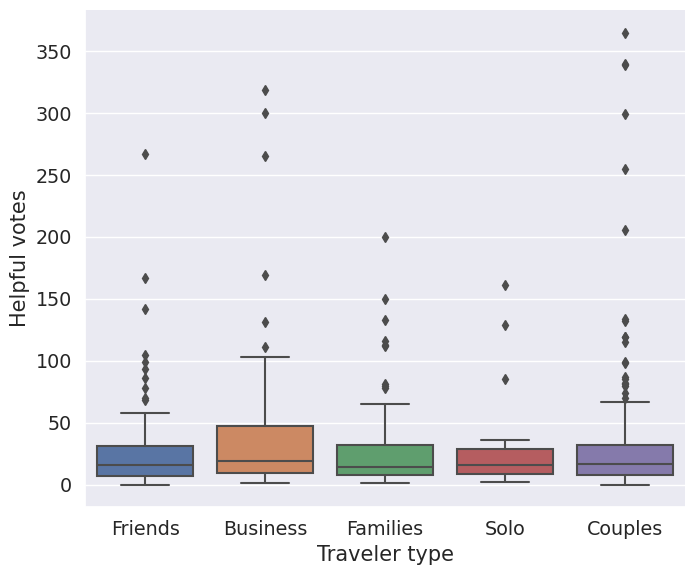

In [5]:
# Set the font size to 1.25
sns.set(font_scale = 1.25)

# Set the background to "darkgrid"
sns.set_style("darkgrid")

# Create a boxplot
sns.catplot(y ="Helpful votes", x="Traveler type", data = reviews, kind = "box", aspect =1.2, height= 6)

plt.show()

It looks like business travelers have left the most helpful reviews, although there are a few reviews by couples that have been really helpful to others.

# Creating a bar plot

Las Vegas hotels are seeing large variations in how helpful reviews appear to other people. The owners of these hotels are curious if there are times of the year when reviews have been more helpful to their potential guests. Help the owners understand their reviews better by creating a bar plot of the average number of helpful votes per review across the categorical variable "Period of stay". The dataset reviews has been preloaded for you.0
* Print out the frequency counts of the variable "Period of stay" to make sure each category has data.
* Create a bar plot using catplot().
* Split the reviews dataset on "Period of stay" across the x-axis.
* Specify the numerical variable to aggregate on as "Helpful votes".
 votes".

Period of stay
Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: count, dtype: int64


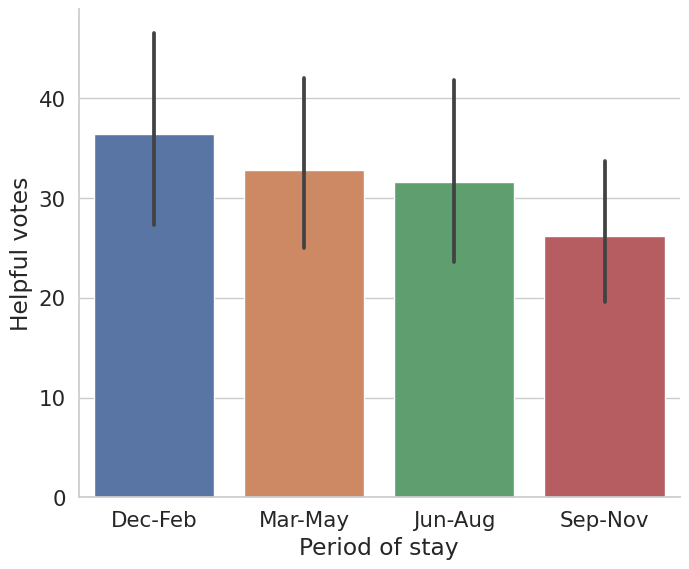

In [6]:
# Print the frequency counts of "Period of stay"
print(reviews["Period of stay"].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Create a bar plot of "Helpful votes" by "Period of stay"
sns.catplot(kind="bar", data=reviews, x="Period of stay", y="Helpful votes", height=6, aspect=1.2)
plt.show()

With .value_counts() we see that each category has a similar number of reviews. It also looks like potential guests find reviews from December-February to be the most helpful, while reviews from September-November appear to be the least helpful.

# Ordering categories

Not all categories are created equal. In the hotel review dataset, reviews, hotel owners know that most of their customers are from North America. When visualizing data broken out by "User continent" they might want North America to appear first. An ordered list of user continents has been provided as continent_categories. In this exercise, you will work through preparing a visualization that is ordered by the frequency counts of a Series.5
* Create a bar chart with "User continent" along the x-axis and "Score" along the y-axis
* Print out the frequency counts of "User continent".
* Convert the "User continent" Series to a categorical and create a bar plot with "User continent" along the x-axis.
* Reorder the "User continent" Series using the ordered list, continent_categories, and rerun the graphic.
axis.

In [7]:
# Set style
sns.set(font_scale=.9)
sns.set_style("whitegrid")

# Print the frequency counts for "User continent"
print(reviews["User continent"].value_counts())



User continent
North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


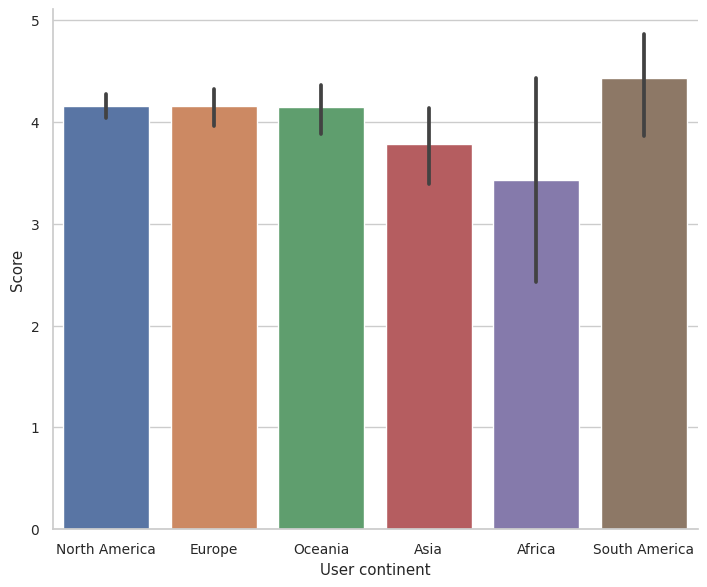

In [8]:
# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype("category")

# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories=continent_categories)

sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", aspect=1.2, height=6 )
plt.show()

You have successfully ordered the graphic from the most common user continent to the least common. Notice that the confidence intervals are smaller for continents with more reviews.

# Bar plot using hue

Aggregating information across multiple categories is often necessary to help stakeholders better understand their data. In preparation for building a dashboard that will allow users to select up to two variables when creating visualizations, you want to test visualizations that use different combinations of categorical variables using a bar plot.5
* Update the plot so that "Casino" (along the x-axis) and "Free internet" (to color the bars) are used to split the data.
* Switch the categories so that "Free internet" is on the x-axis and "Casino" is in the legend.
* Update the x parameter to be "User continent".
* The font was too large for the last visualization - change the font size to 1.0.
 to 1.0.

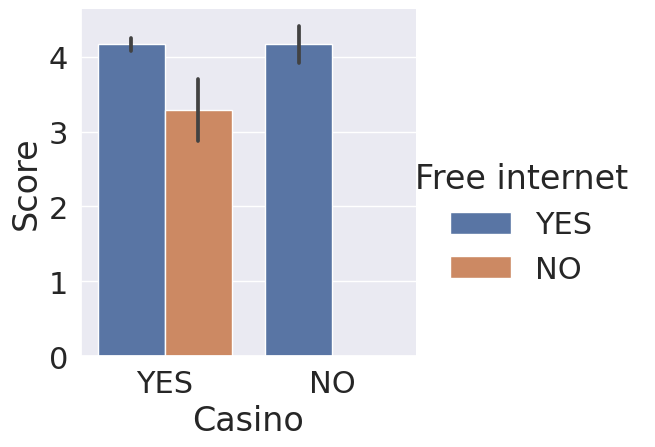

In [9]:
# Add a second category to split the data on: "Free internet"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Casino", y="Score", data=reviews, kind="bar", hue="Free internet")
plt.show()

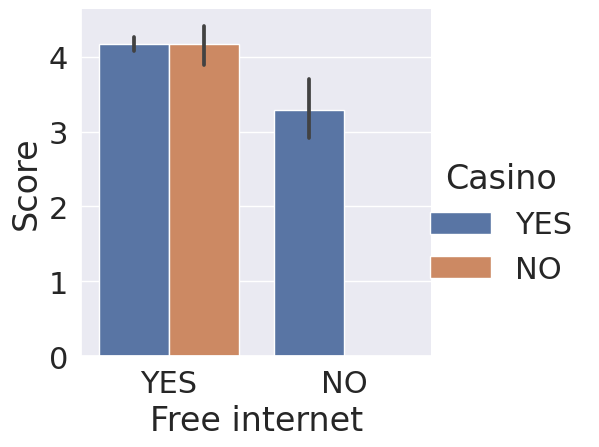

In [10]:
# Switch the x and hue categories
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Free internet", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

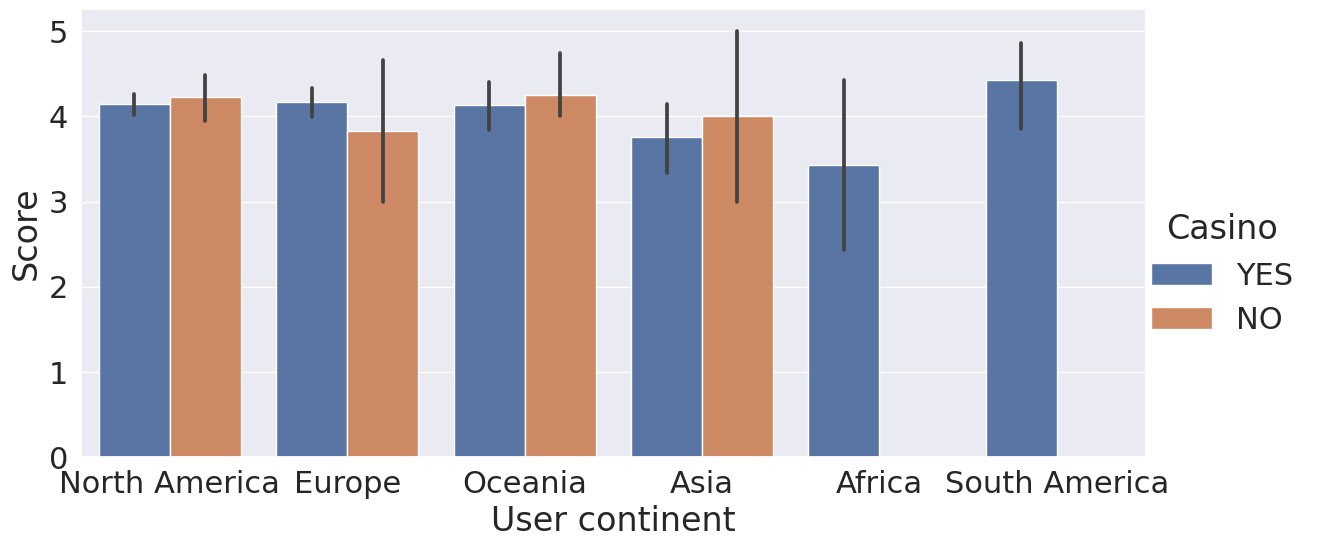

In [17]:
# Update x to be "User continent"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino", aspect= 2, height= 6)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

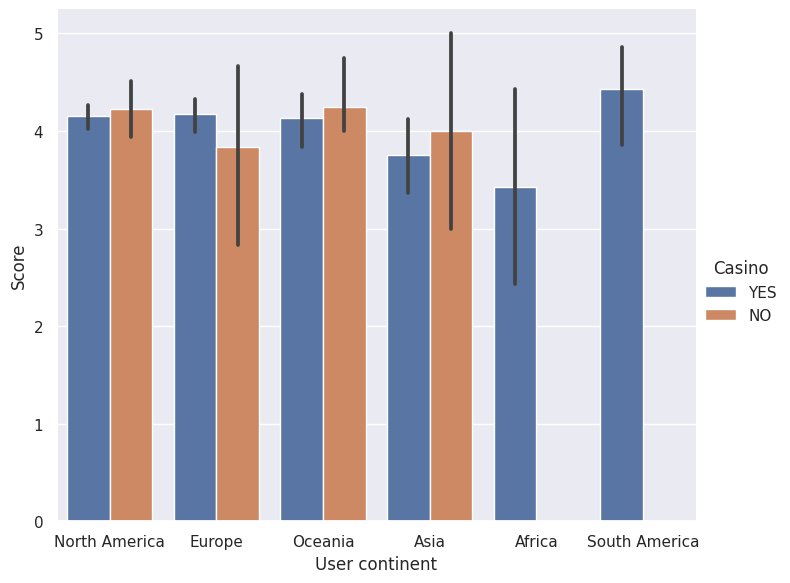

In [19]:
# Lower the font size so that all text fits on the screen.
sns.set(font_scale = 1.0)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino", aspect= 1.2, height= 6)
plt.show()

. When creating multiple visualizations, you need to make sure the Seaborn settings will work for all of the possible outputs. For your dashboard, you made font_scale smaller because of the number of categories in the x parameter.

# Creating a point plot

Creating helpful visualizations sometimes requires a lot of testing. You have been asked to create a visualization that shows the number of reviews, "Nr. reviews", which is the number of reviews a reviewer has previously written, across a hotel's star rating, "Hotel stars". Since the number of reviews is numerical, you have decided to use a point plot to show the mean of the data across the categories.0
* Using the catplot() function, create a point plot.
* Split the data across the x-axis using "Hotel stars".
* Specify the numerical variable to visualize to "Nr. reviews".
* Update the arguments so that any lines that appear do not overlap.
overlap.

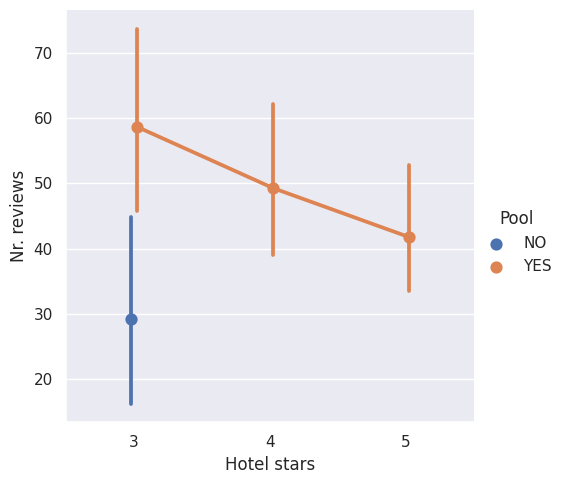

In [20]:
# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot(
  # Split the data across Hotel stars and summarize Nr. reviews
  x="Hotel stars",
  y="Nr. reviews",
  data=reviews,
  # Specify a point plot
  kind="point",
  hue="Pool",
  # Make sure the lines and points don't overlap
  dodge=True
)
plt.show()

It is great to see big differences in the average number of previous reviews across the different hotel star ratings for hotels with a pool, there aren't enough 4 and 5 star hotels without a pool to display any information. We might want to find a different category for the hue parameter here or just show the 'Nr. of reviews' across the different hotel star ratings.

# Creating a count plot

When creating quick analysis of frequency counts, you have been using .value_counts(). This is a great way for you to see the counts and get an idea of which categories are present in the data. However, sending frequency tables to clients or coworkers may not always be a good idea. For this exercise, you wil l**visualize the number of reviews by their "Score"**". Although "Score" has been used as a numerical variable in the past, it can be used as a categorical variable given that it has five unique values that are ordered from worst to best. The reviews dataset has been preloaded.0
* Use the catplot() function to display count frequencies using the reviews dataset.
* Count the frequencies for the "Score" variable across the x-axis.
* When counting the frequencies, color the bars using the "Traveler type" column.
column.

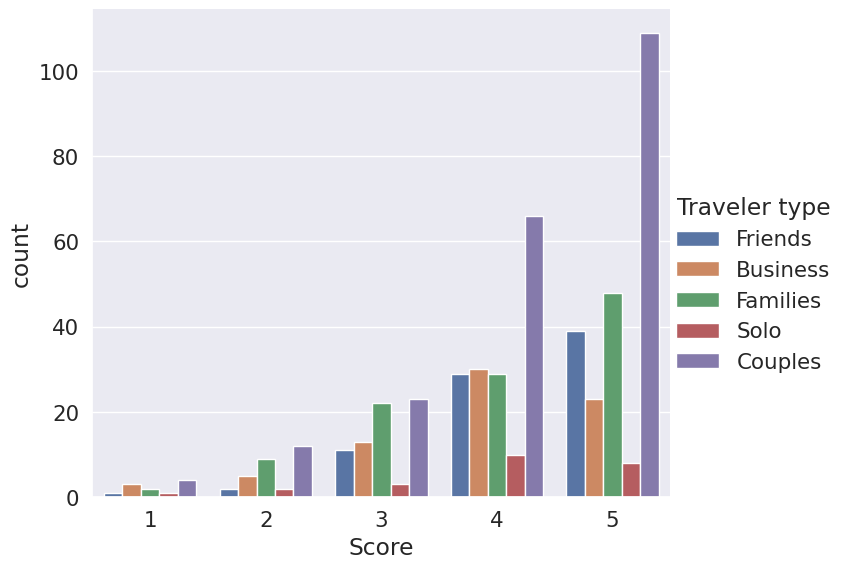

In [22]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(
  data=reviews, x="Score", hue="Traveler type", kind="count", aspect= 1.2, height= 6)

plt.show()

The couples Traveler type and a score of 5 were the most common values found in the data. Don't worry about the legend placement. We can move this outside of the chart if needed.

**Review catplot() types**

Analysts are often asked to create visualizations based on categorical columns. Selecting the best visualization for the task at hand takes practice. This exercise will recap the four different types of plots that were discussed in this chapter so that you can use the correct plot when you begin making visualizations.

For this exercise, drag the different kind's of plots into the order in which they appear in the instructions

1.  a graphical form of a frequency table.
2.  has the parameters, join and dodge, which can update the look of the lines in the plot.
3.   can be used to see the distribution and outliers of a numeric column.
4.    is similar to a point plot and can be used to see the central tendency of numerical data.


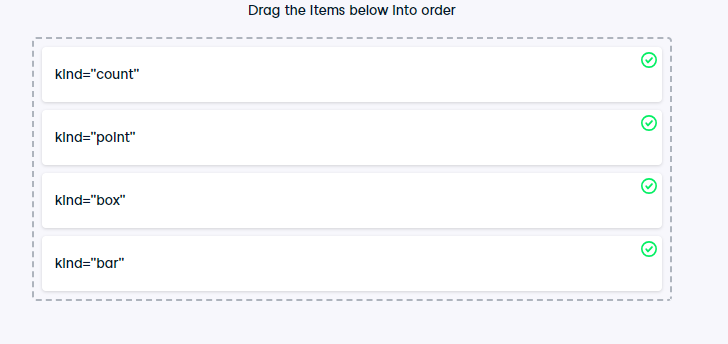ical data.

# One visualization per group

While working on a data exploration project, you have been asked to visualize the number of reviews of hotels by "Period of stay" and by the day of the week, "Review weekday". The goal of this visualization is to see what day of the week has the most reviews for each of the four periods of stay. The reviews dataset has been preloaded for you, as well as both seaborn, as sns, and matplotlib.pyplot as plt.* Create a catplot() using "count" as the type of graphic.* 
Count the number of reviews by "Review weekday"
* .* 
Create individual plots for each "Period of stay"* .
Wrap the plots after every 2nd graphic.

nd graphic.



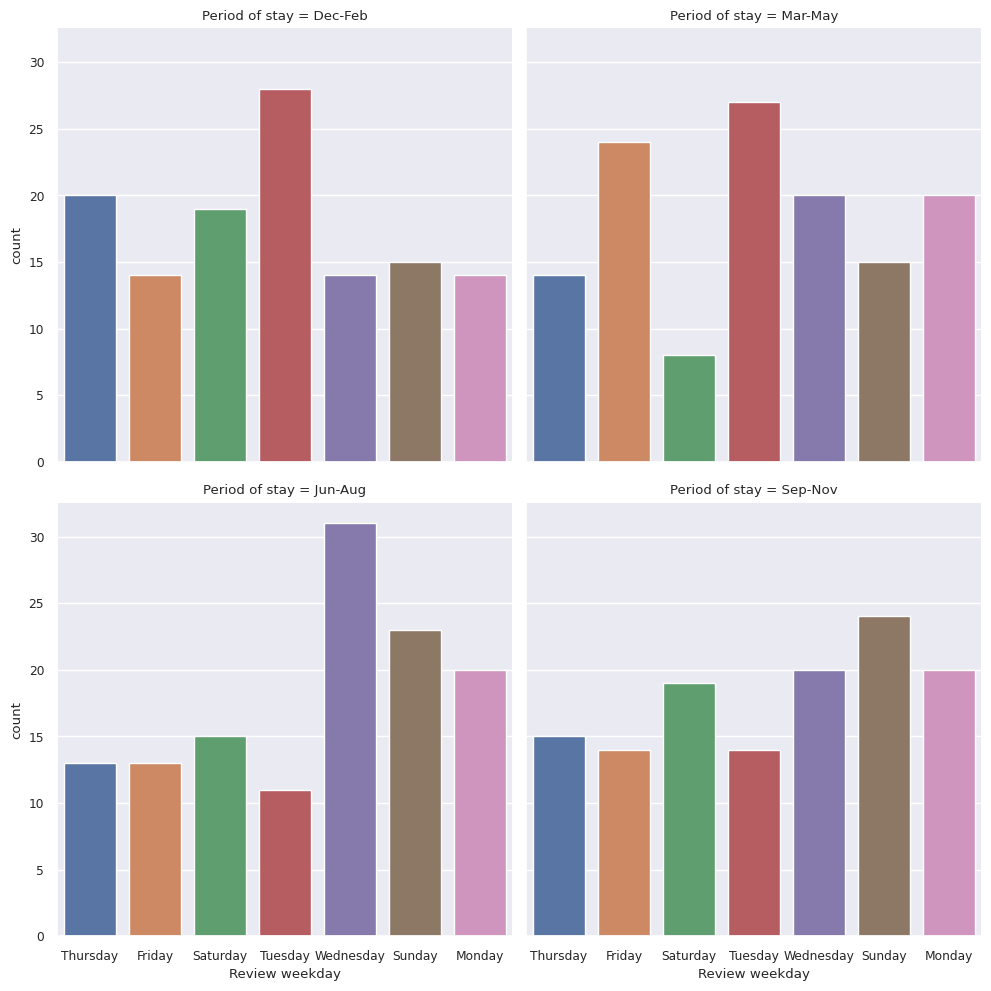

In [25]:
sns.set(font_scale=0.8)

# Create a catplot for each "Period of stay" broken down by "Review weekday"
ax = sns.catplot(
  # Make sure Review weekday is along the x-axis
  x="Review weekday",
  # Specify Period of stay as the column to create individual graphics for
  col="Period of stay",
  # Specify that a count plot should be created
  kind = "count",
  # Wrap the plots after every 2nd graphic.
  col_wrap = 2,
  data=reviews
)
plt.show()

Did you notice that Tuesday was the most common review day for December through May, but one of the least common days for June through November? Creating side-by-side categorical plots is a great way to visualize your data.

# Updating categorical plots

Hotels are constantly working to get better reviews from their customers. A hotel chain has asked you to create visualizations to help the company understand why people might provide various ratings after staying at their hotels. A manager has asked if hotels with "Free internet" receive higher reviews given the "Traveler type".

Creating visualizations is an iterative process. In this exercise, you will start with a basic graphic and iteratively add features until you have a finished product. The reviews dataset has been preloaded for you, as well as both seaborn, as sns, and matplotlib.pyplot as pl
* Adjust the color of the plot to be seaborn's "Set2" palette.
  * Add the title "Hotel Score by Traveler Type and Free Internet Access".
  * Update the axis labels to be "Free Internet" for the x-axis and "Average Review Rating" for the y-axis.
  *   Adjust the starting height of the graphic to be 93% of the full visualization height.
.

alette.

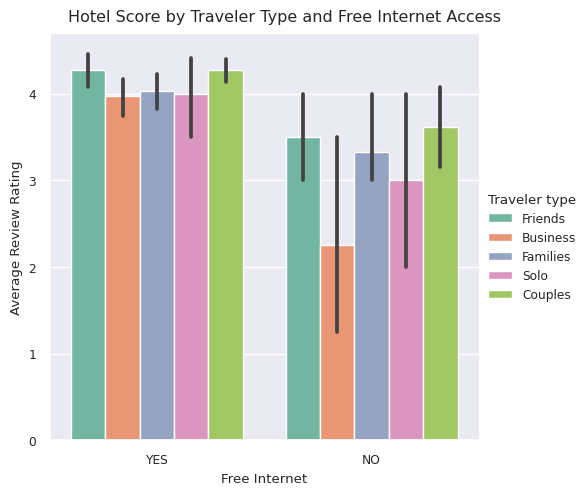

In [26]:
# Adjust the color
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette("Set2")
)

# Add a title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
# Update the axis labels
ax.set_axis_labels("Free Internet", "Average Review Rating")

# Adjust the starting height of the graphic
plt.subplots_adjust(top =0.93)
plt.show()

It looks like free internet really makes a difference, especially for business-related travelers. It is important to create plots that highlight the results you are trying to convey.